In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline

import tensorflow as tf

import numpy
import matplotlib.pyplot as plt

In [4]:
# repeating the data prep from the previous notebook
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype(numpy.float32)
x_test  = x_test.astype(numpy.float32)

x_train /= 255.
x_test  /= 255.

print(x_train.shape)
x_train = x_train.reshape(x_train.shape[0], numpy.prod(x_train[0,:,:].shape))
x_test = x_test.reshape(x_test.shape[0], numpy.prod(x_test[0,:,:].shape))

print(x_train.shape)
y_train = y_train.astype(numpy.int32)
y_test  = y_test.astype(numpy.int32)

print()
print('MNIST data loaded: train:',len(x_train),'test:',len(x_test))
print('X_train:', x_train.shape)
print('y_train:', y_train.shape)

# one-hot encoding:
nb_classes = 10
y_train_onehot = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test_onehot = tf.keras.utils.to_categorical(y_test, nb_classes)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000, 784)

MNIST data loaded: train: 60000 test: 10000
X_train: (60000, 784)
y_train: (60000,)


In [5]:
!wget https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/02_neural_networks_python/fc_net.py
!wget https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/02_neural_networks_python/layer_utils.py
!wget https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/02_neural_networks_python/layers.py

--2022-09-30 23:28:42--  https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/02_neural_networks_python/fc_net.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3920 (3.8K) [text/plain]
Saving to: ‘fc_net.py’

fc_net.py           100%[===================>]   3.83K  --.-KB/s    in 0s      

2022-09-30 23:28:42 (48.9 MB/s) - ‘fc_net.py’ saved [3920/3920]

--2022-09-30 23:28:42--  https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/02_neural_networks_python/layer_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent

In [6]:
# Here we import an implementation of a two-layer neural network 
# this code is based on pieces of the first assignment from Stanford's CSE231n course, 
# hosted at https://github.com/cs231n/cs231n.github.io with the MIT license
from fc_net import TwoLayerNet

In [16]:
num_features = x_train.shape[1] # this is the number of pixels
# The weights are initialized from a normal distribution with standard deviation weight_scale
# ini_model = TwoLayerNet(input_dim=num_features, hidden_dim=300, num_classes=nb_classes, weight_scale=.01)

In [17]:
# here you can take a look if you want at the initial loss from an untrained network
loss, gradients = ini_model.loss(x_train, y_train_onehot)

In [11]:
# a simple implementation of stochastic gradient descent
def sgd(model, gradients, learning_rate):
    for p, w in model.params.items():
        dw = gradients[p]
        new_weights = w - learning_rate * dw
        model.params[p] = new_weights
    return model

In [12]:
# one training step
def learn(model, x_train, y_train_onehot, learning_rate):
    loss, gradients = model.loss(x_train, y_train_onehot)
    model = sgd(model, gradients, learning_rate)
    return loss, model

In [13]:
def accuracy(model, x, true_values):
    scores = model.loss(x)
    predictions = numpy.argmax(scores, axis=1)
    N = predictions.shape[0]
    acc = (true_values == predictions).sum() / N
    return acc

In [20]:
# Here's an example training loop using this two-layer model. Can you do better? 


# We first tune the hyperparameters: batch size and learning rate

num_epochs = 10  
num_examples = x_train.shape[0]

for batch_size in [2000, 5000, 10000, 15000, 20000]:
  num_batches = int(num_examples / batch_size)
  losses = numpy.zeros(num_epochs,)
  accuracies = numpy.zeros(num_epochs,)
  indices = numpy.arange(num_examples)
  for learning_rate in [0.001, 0.01, 0.1]:
    model = TwoLayerNet(input_dim=num_features, hidden_dim=300, num_classes=nb_classes, weight_scale=.01)
    for epoch in range(0, num_epochs):
        # in each epoch, we loop over all of the training examples
        for step in range(0, num_batches):
            # grabbing the next batch
            offset = step * batch_size
            batch_range = range(offset, offset+batch_size)
            x_train_batch = x_train[batch_range, :]
            y_train_batch = y_train_onehot[batch_range,:]    
            # feed the next batch in to do one sgd step
            loss, model = learn(model, x_train_batch, y_train_batch, learning_rate)
        losses[epoch] = loss
        accuracies[epoch] = accuracy(model, x_train, y_train)
        # print("epoch %d, loss %.5f, accuracy %.2f" % (epoch, loss, accuracies[epoch]))
    print("For learnig rate %.3f, batches %d, accuracy is %.5f" % (learning_rate, batch_size, accuracies[num_epochs-1]))



For learnig rate 0.001, batches 2000, accuracy is 0.27303
For learnig rate 0.010, batches 2000, accuracy is 0.59008
For learnig rate 0.100, batches 2000, accuracy is 0.89265
For learnig rate 0.001, batches 5000, accuracy is 0.11305
For learnig rate 0.010, batches 5000, accuracy is 0.45767
For learnig rate 0.100, batches 5000, accuracy is 0.83813
For learnig rate 0.001, batches 10000, accuracy is 0.08815
For learnig rate 0.010, batches 10000, accuracy is 0.46910
For learnig rate 0.100, batches 10000, accuracy is 0.72497
For learnig rate 0.001, batches 15000, accuracy is 0.13105
For learnig rate 0.010, batches 15000, accuracy is 0.33812
For learnig rate 0.100, batches 15000, accuracy is 0.61873
For learnig rate 0.001, batches 20000, accuracy is 0.09110
For learnig rate 0.010, batches 20000, accuracy is 0.34522
For learnig rate 0.100, batches 20000, accuracy is 0.60403


The above results indicate a learnig rate of 0.100 and batch size of 5000 is a good option

In [22]:
# Now we increase the epochs to achieve better accuracies
num_epochs = 100  
batch_size = 5000
num_batches = int(num_examples / batch_size)
losses = numpy.zeros(num_epochs,)
accuracies = numpy.zeros(num_epochs,)
indices = numpy.arange(num_examples)
learning_rate = 0.1
model = TwoLayerNet(input_dim=num_features, hidden_dim=300, num_classes=nb_classes, weight_scale=.01)
for epoch in range(0, num_epochs):
    # in each epoch, we loop over all of the training examples
    for step in range(0, num_batches):
        # grabbing the next batch
        offset = step * batch_size
        batch_range = range(offset, offset+batch_size)
        x_train_batch = x_train[batch_range, :]
        y_train_batch = y_train_onehot[batch_range,:]    
        # feed the next batch in to do one sgd step
        loss, model = learn(model, x_train_batch, y_train_batch, learning_rate)
    losses[epoch] = loss
    accuracies[epoch] = accuracy(model, x_train, y_train)
    if epoch%10 == 0:
      print("epoch %d, loss %.5f, accuracy %.2f" % (epoch, loss, accuracies[epoch]))

epoch 0, loss 2.26981, accuracy 0.54
epoch 10, loss 0.54854, accuracy 0.85
epoch 20, loss 0.34037, accuracy 0.89
epoch 30, loss 0.28542, accuracy 0.90
epoch 40, loss 0.25885, accuracy 0.91
epoch 50, loss 0.24157, accuracy 0.91
epoch 60, loss 0.22817, accuracy 0.92
epoch 70, loss 0.21660, accuracy 0.92
epoch 80, loss 0.20615, accuracy 0.92
epoch 90, loss 0.19648, accuracy 0.93


Text(0.5, 1.0, 'Accuracies-iterations')

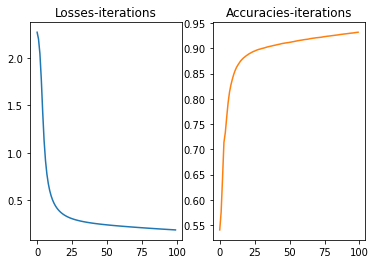

In [23]:
fig, axs = plt.subplots(1, 2)
axs[0].plot(losses)
axs[0].set_title('Losses-iterations')
axs[1].plot(accuracies, 'tab:orange')
axs[1].set_title('Accuracies-iterations')

In [24]:
# reshuffle the data so that we get a new set of batches
numpy.random.shuffle(indices)
x_train = x_train[indices,:]
y_train = y_train[indices] # keep this shuffled the same way for use in accuracy calculation
y_train_onehot = y_train_onehot[indices,:]
accuracy(model, x_train, y_train)

0.9317166666666666

# Homework: improve the accuracy of this model. 

Update this notebook so that the accuracy is improved. How high can you get it? You could change things directly in the notebook, such as increasing the number of epochs, changing the learning weight, changing the width of the hidden layer, etc. If you're more ambitious, you could also try changing the model definition itself by checking out the associated Python files. For example, you could add more layers to the network. The current notebook has a training accuracy of about 43%, but will vary with randomness.

# See Above